## Bone Fracture Detection


# Data Preprocessing

In [ ]:
## Step 1: Preparing the Dataset
# import all the libraries
import os
import random
import shutil

# Split making function
def split_folder_content(input_folder, output_folders, percentages):
    # length of output_folders and percentages should be same, else throw an error
    if len(output_folders) != len(percentages):
        raise ValueError("Number of output folders and percentages should be the same")

    # make split directories, if they dont exist
    for folder in output_folders:
        os.makedirs(folder, exist_ok=True)

    # generate list of all files in input directory
    files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    total_files = len(files)
    file_counts = [int(total_files * p) for p in percentages]
    file_counts[-1] += total_files - sum(file_counts)

    # Shuffle all file at random, amoungst its class
    random.shuffle(files)

    # Split each class into the split folder
    start_index = 0
    for folder, count in zip(output_folders, file_counts):
        end_index = start_index + count
        for file in files[start_index:end_index]:
            shutil.copy(os.path.join(input_folder, file), os.path.join(folder, file))
        start_index = end_index

# SPLITING the DATASET into TRAIN, TEST, VALIDATION
# Place ALL the fracture images (fractured + non-fractured) in a directory
images_input_folder   = "images" # path to all images (fractured + non-fractured)

# Make 3Directories for train, test, validation; each containing 2directories images, and labels
# Specify path for images directory for each (train, validation, test)
images_output_folders = ["TrainValTestSplit/train/images", "TrainValTestSplit/valid/images", "TrainValTestSplit/test/images"]

# Specify split percentage (train, validation, test)
split = [0.7, 0.2, 0.1]

# Call the split making function
split_folder_content(images_input_folder, images_output_folders, split)

In [ ]:
# Once splitted, next is to find coresponding labels for each spilt, and place them in coresponding folders
images_input_folders = ["TrainValTestSplit/train/images", "TrainValTestSplit/valid/images", "TrainValTestSplit/test/images"]
input_label_folder   = "annotation"
label_output_folers  = ["TrainValTestSplit/train/labels", "TrainValTestSplit/valid/labels", "TrainValTestSplit/test/labels"]

for folder_pos in range(len(images_input_folders)):
    for fileName in os.listdir(images_input_folders[folder_pos]):
        file = fileName.split('.')[0]
        shutil.copy(os.path.join(input_label_folder, (file+'.txt')), label_output_folers[folder_pos])

In [ ]:
# Next is to create a "data.yaml" file, required to train the yolo
# data.yaml file contains path to all train, validataion, and test split
# along with total number of classes to identifty
'''
train: /content/drive/MyDrive/InMedAiEngg/yolo-v8/train
val: /content/drive/MyDrive/InMedAiEngg/yolo-v8/valid
test: /content/drive/MyDrive/InMedAiEngg/yolo-v8/test

nc: 1
names: ['fractured']
'''

"\ntrain: /content/drive/MyDrive/InMedAiEngg/yolo-v8/train\nval: /content/drive/MyDrive/InMedAiEngg/yolo-v8/valid\ntest: /content/drive/MyDrive/InMedAiEngg/yolo-v8/test\n\nnc: 1\nnames: ['fractured']\n"

# Training

In [ ]:
# Check if GPU is availeble for training
!nvidia-smi

Fri Jan 26 11:52:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Connect to Google Drive, thats where the is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# UnZip the pre-processed data for yolo training
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/InMedAiEngg/yolo-v8.zip"
extracted_path = "/content/drive/MyDrive/InMedAiEngg/"

os.makedirs(extracted_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Successfully extracted contents to {extracted_path}")

Successfully extracted contents to /content/drive/MyDrive/InMedAiEngg/


In [ ]:
# Installing all "ultralytics" library
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
# Checking the installation for ultralytics, and testing the pretrained model on default image
from ultralytics import YOLO
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 6.23M/6.23M [00:00<00:00, 120MB/s]

2024-01-26 11:53:48.287570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 11:53:48.287634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 11:53:48.289017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 11:53:49.286737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 52.

In [ ]:
# Test Run of training for 3Epochs
%cd /content/drive/MyDrive/In-Med AiEngg/yolo-v8

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=3 imgsz=512 plots=True

/content/drive/MyDrive/In-Med AiEngg/yolo-v8
100% 21.5M/21.5M [00:00<00:00, 131MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=3, patience=50, batch=16, imgsz=512, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

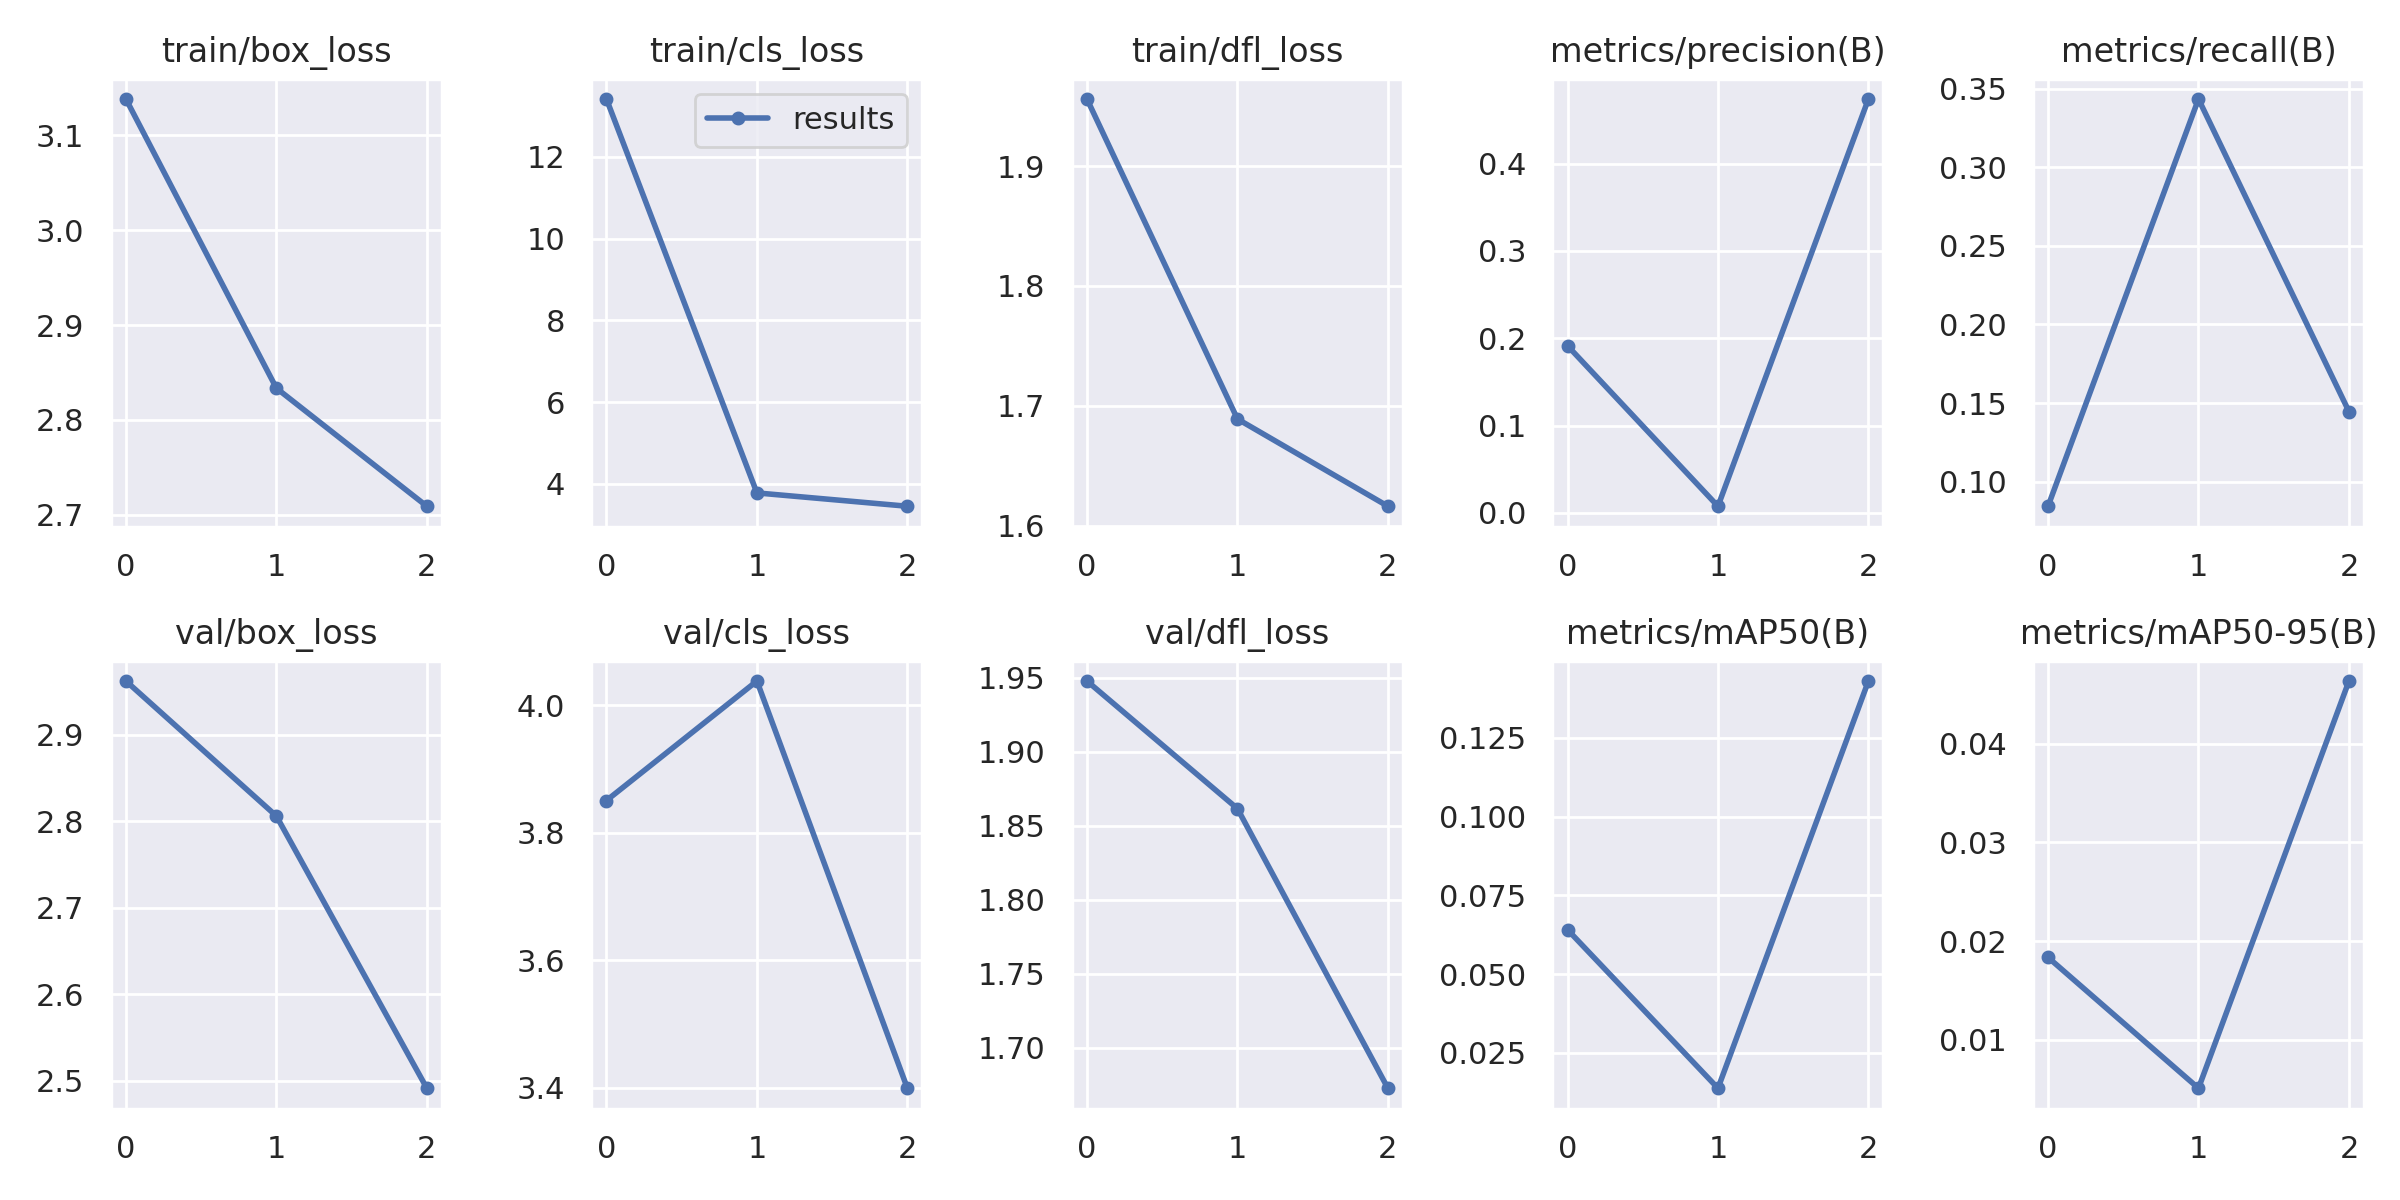

In [ ]:
from IPython.display import display, Image

Image(filename='/content/drive/MyDrive/In-Med AiEngg/yolo-v8/runs/detect/train/results.png', width=600)

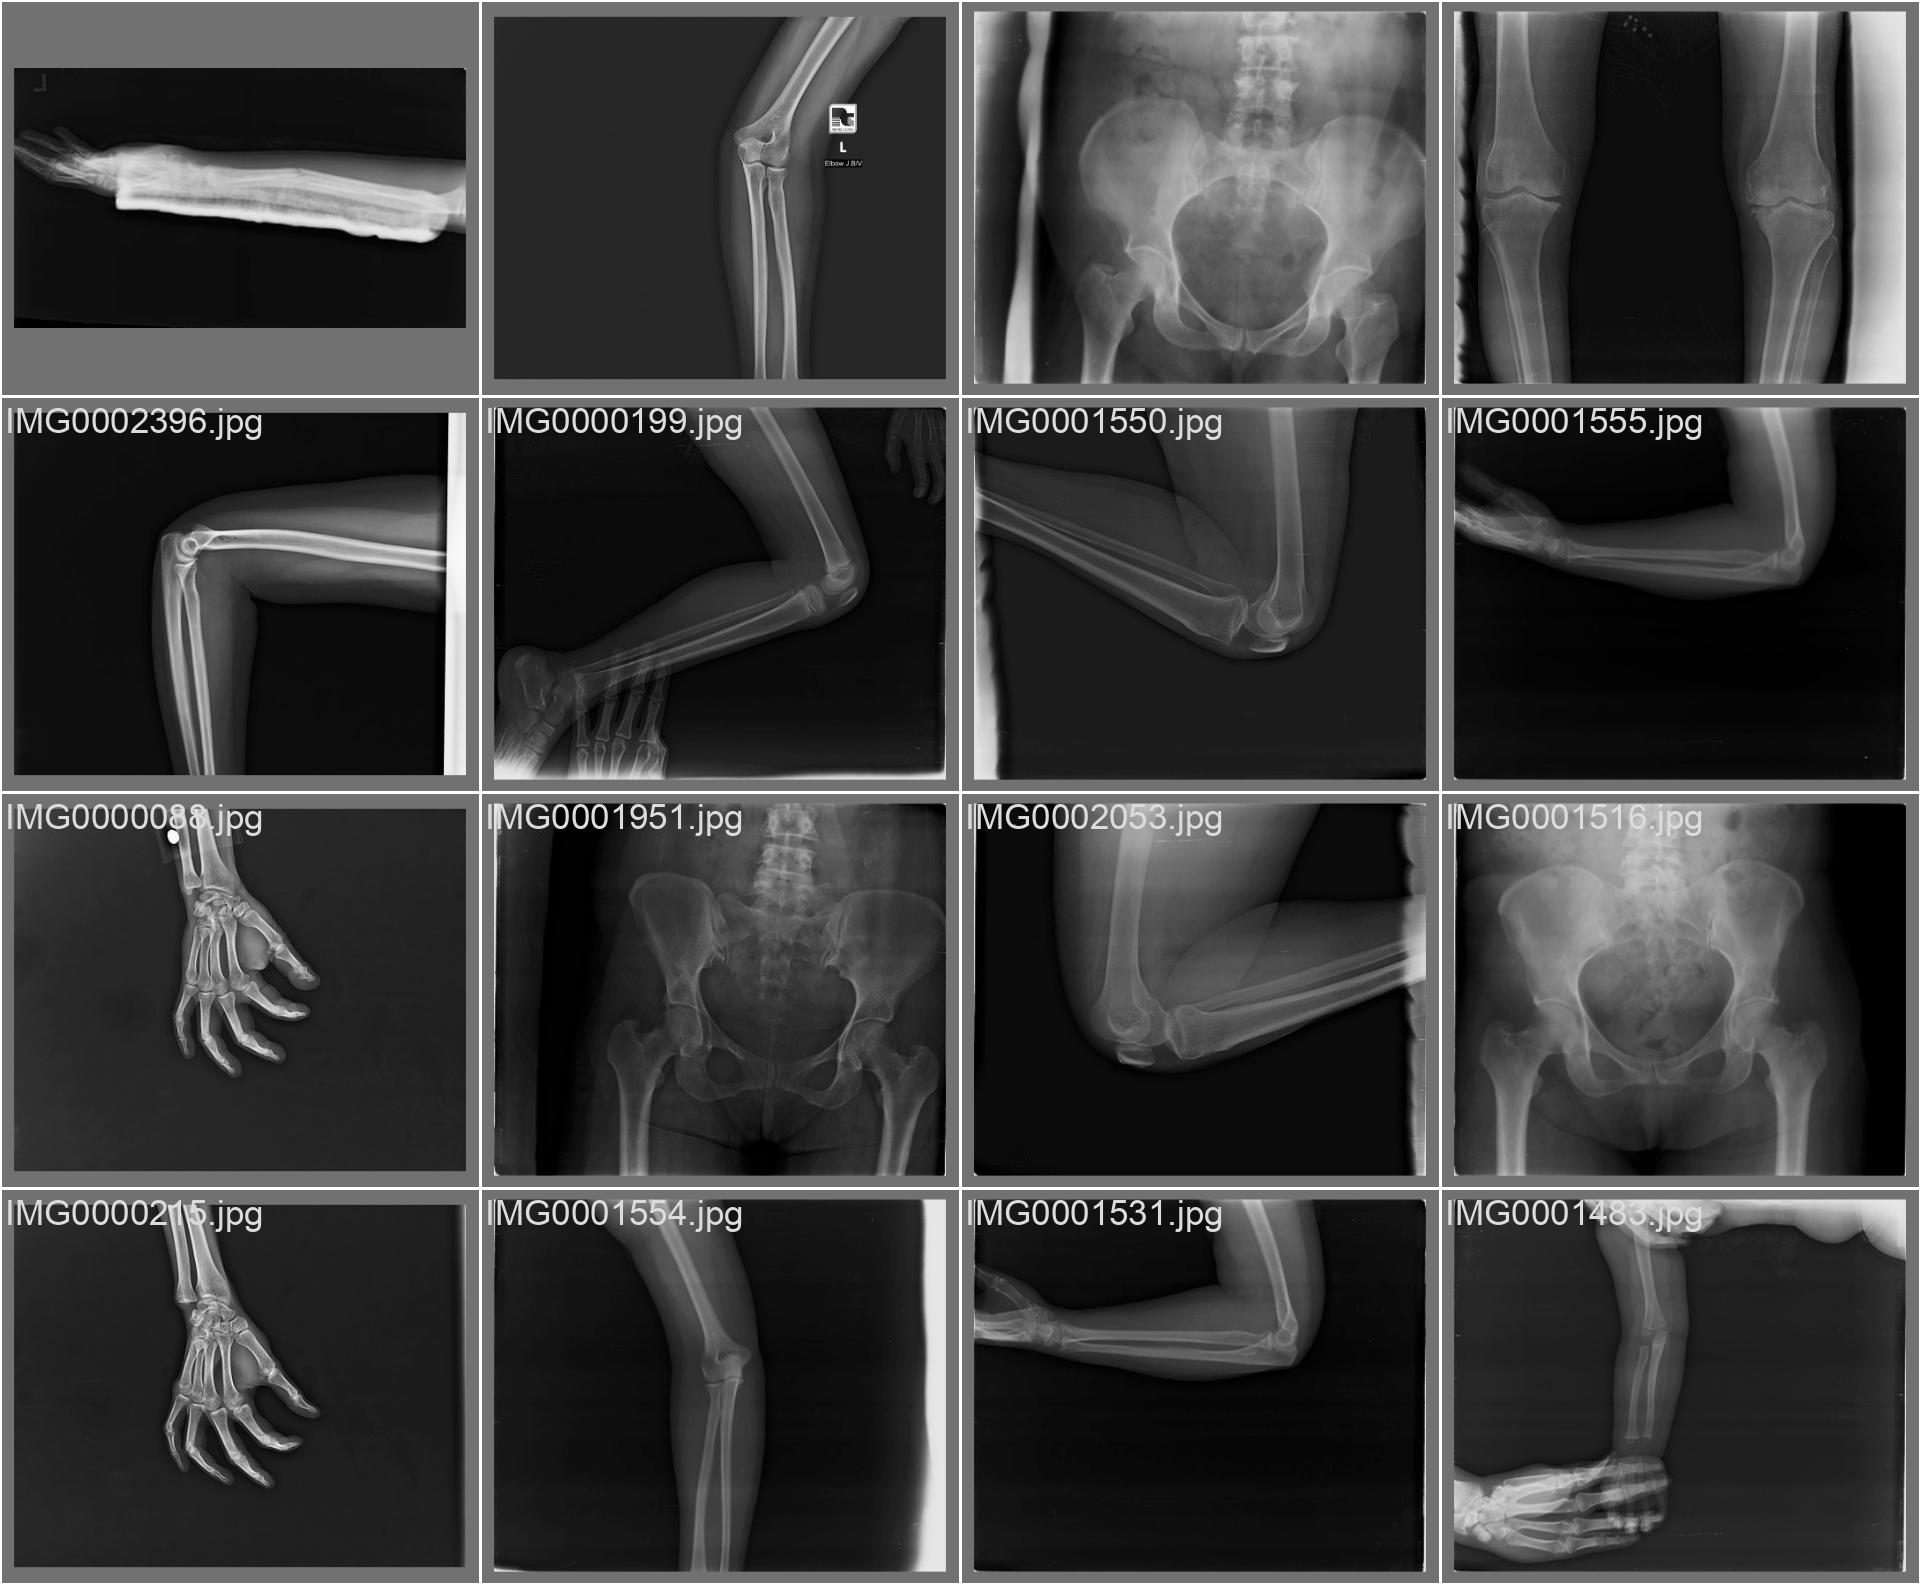

In [ ]:
Image(filename='/content/drive/MyDrive/In-Med AiEngg/yolo-v8/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd /content/drive/MyDrive/InMedAiEngg/yolo-v8

!yolo task=detect mode=train resume=True model="/content/drive/MyDrive/InMedAiEngg/yolo-v8/runs/detect/train2/weights/"last.pt data=data.yaml epochs=250 imgsz=512 plots=True

/content/drive/MyDrive/InMedAiEngg/yolo-v8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/InMedAiEngg/yolo-v8/runs/detect/train2/weights/last.pt, data=data.yaml, epochs=250, patience=50, batch=16, imgsz=512, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

# Testing

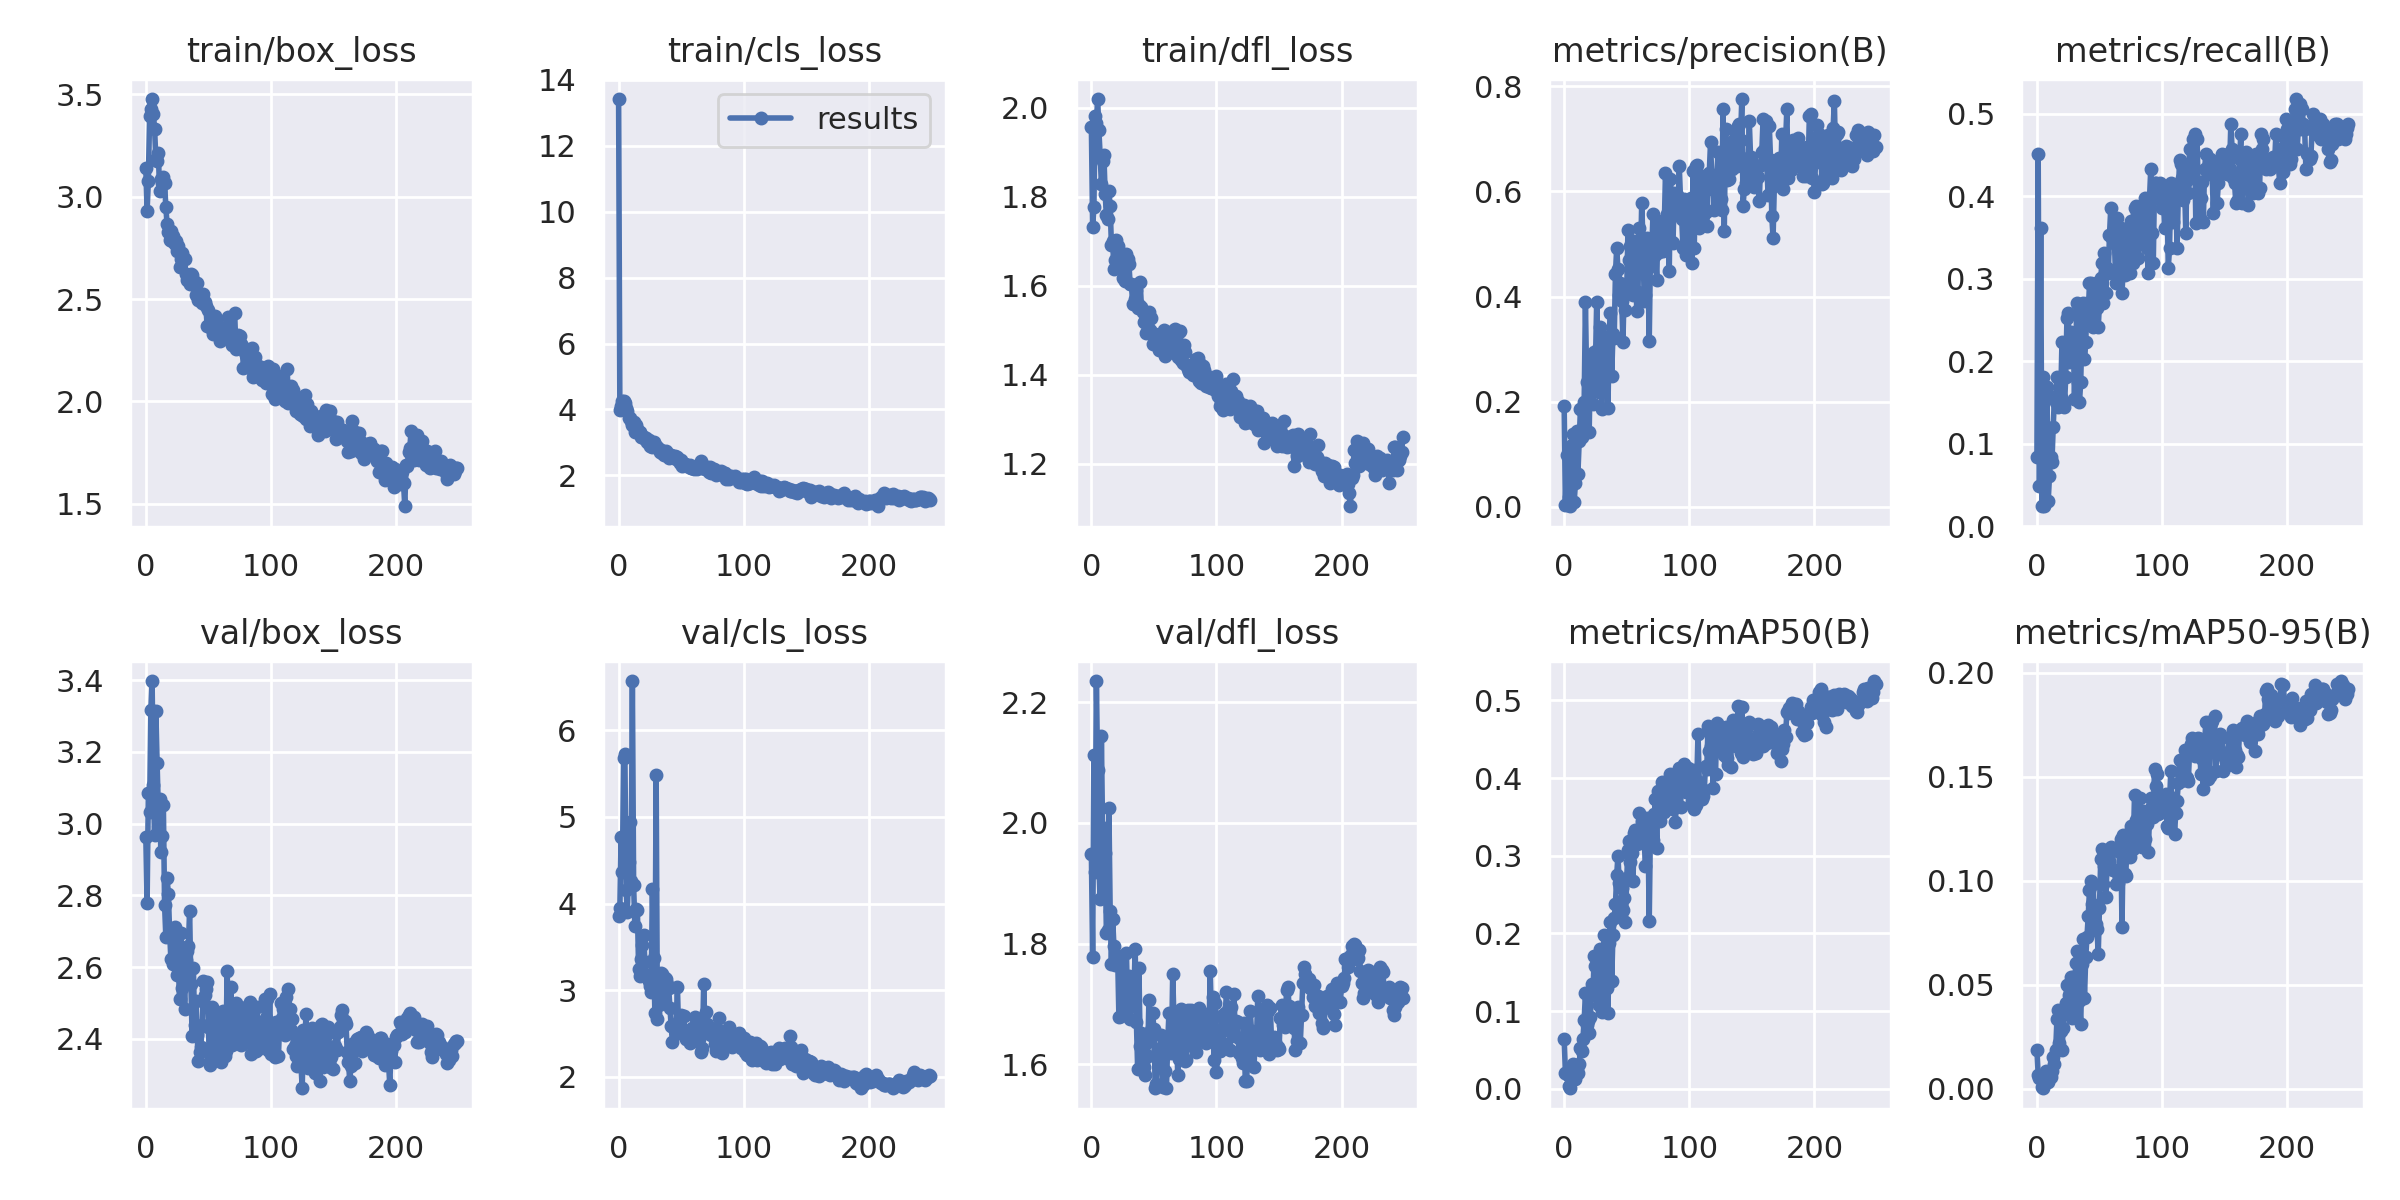

In [ ]:
from IPython.display import display, Image

Image(filename='/content/drive/MyDrive/InMedAiEngg/yolo-v8/runs/detect/train2/results.png', width=600)

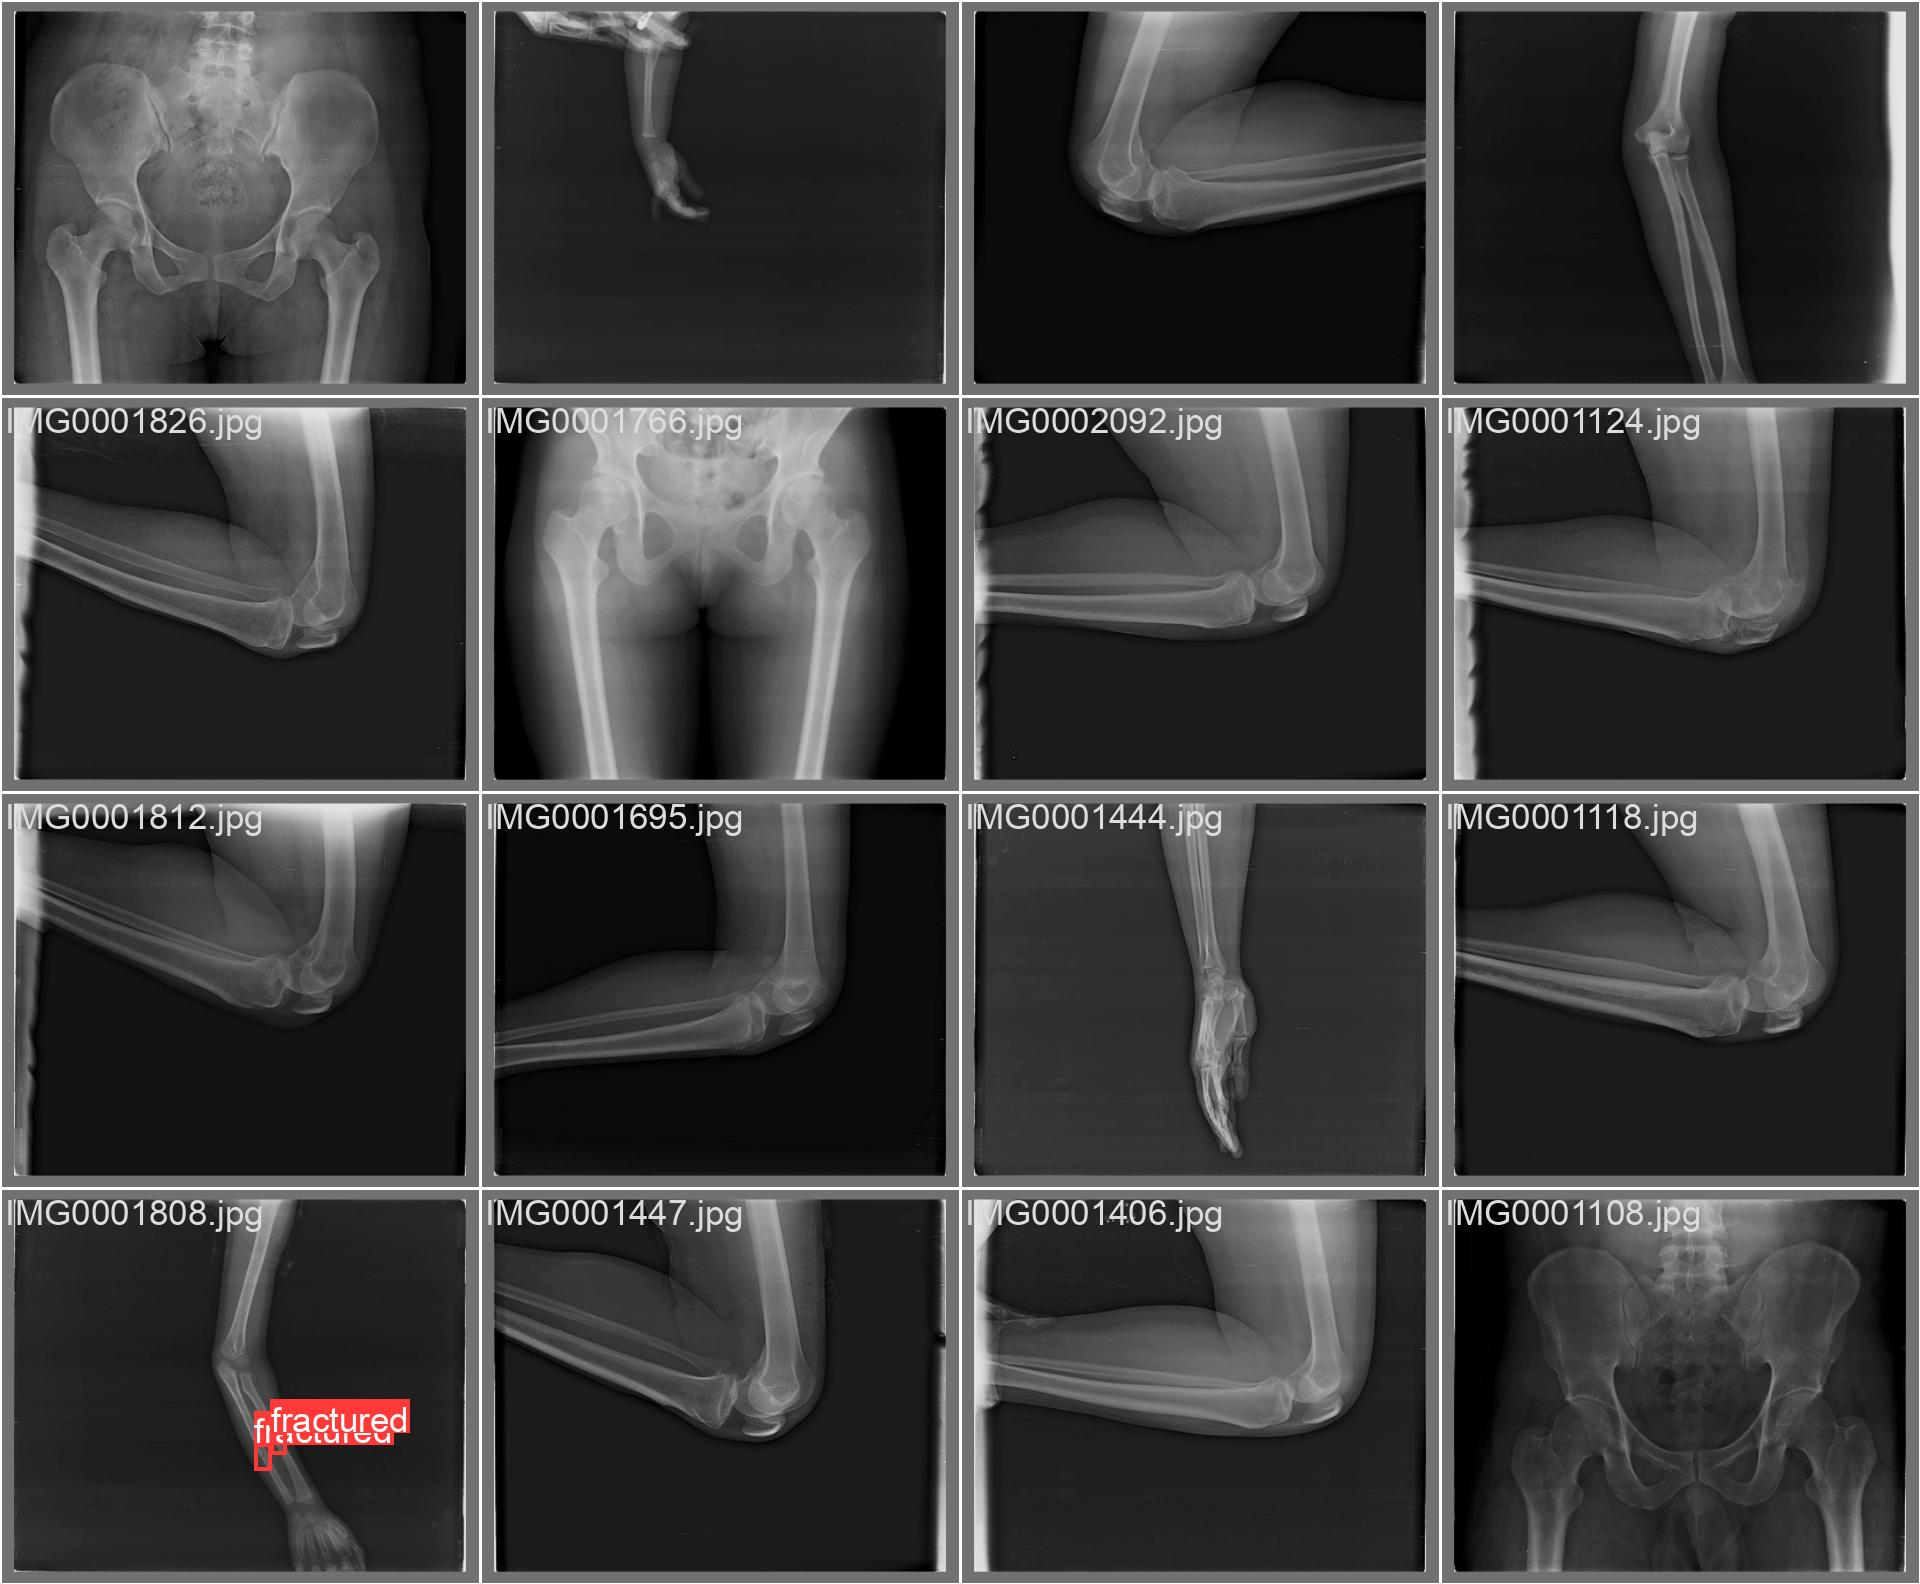

In [ ]:
Image(filename='/content/drive/MyDrive/InMedAiEngg/yolo-v8/runs/detect/train2/val_batch1_labels.jpg', width=600)

In [ ]:
import numpy as np
from PIL import Image, ImageDraw

def draw_boxes(image, results, groundTruth, confidence_threshold=0.5):
    width, height = image.size

    draw = ImageDraw.Draw(image)

    for result in results:
      boxes = result.boxes
      x, y, X, Y = np.array(boxes.xyxy).flatten()
      color = (0, 255, 0)
      draw.rectangle([x, y, X, Y], outline=color, width=2)
      draw.text((x, y - 10), "fracture", fill=color)

    for truthBox in groundTruth:
      classVal, x, y, w, h = truthBox
      xMin = int((x - w / 2) * width)
      xMax = int((x + w / 2) * width)
      yMin = int((y - h / 2) * height)
      yMax = int((y + h / 2) * height)
      color = (255, 0, 0)
      draw.rectangle([xMin, yMin, xMax, yMax], outline=color, width=2)
      draw.text((xMin, yMax), "ground truth", fill=color)

    return image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


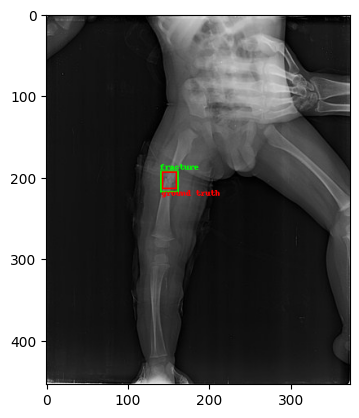

-----


In [ ]:
import os
import PIL
from ultralytics import YOLO
from IPython.display import Image
import matplotlib.pyplot as plt

# place test image folder path herw
test_images_path = "/content/drive/MyDrive/InMedAiEngg/yolo-v8/test/images"
test_images_annotation = "/content/drive/MyDrive/InMedAiEngg/yolo-v8/test/labels"

# placing best model here
model = YOLO('/content/drive/MyDrive/InMedAiEngg/yolo-v8/runs/detect/train2/weights/best.pt')
for fileName in os.listdir(test_images_path):
  groundTruth = []
  with open(os.path.join(test_images_annotation, fileName.split('.')[0]+'.txt')) as file:
    for line in file:
        groundTruth.append(np.array(line.split(), dtype=np.double))
  image = PIL.Image.open(os.path.join(test_images_path, fileName))
  results = model(os.path.join(test_images_path, fileName))
  result_image = draw_boxes(image.copy(), results[0], groundTruth)
  plt.imshow(result_image)
  plt.show()
  print("-----")
  break